# Intro to ML
## Ex0



### 1. Algebra, Random variables

$ \Omega = $ The sample space (the set of outcomes)  
$ \omega = $ The outcome  
$ P(\omega) >0 = $ The probability of an outcome  
$ \sum_{\omega \in \Omega} P(\omega) = 1 $ So sum of probabilities is 1  

$ X = $ a real-valued random variable (satunnaismuuttuja)  

$ X(\omega) $ creates a mapping between real numbers and the possible outcomes

#### a)
An operator $L$ is linear if it obeys:
$$ L ( x + y ) = L x + L y $$
where $ x,y $ are eg. functions

and 
$$ L (\lambda x) = \lambda L x $$
where $\lambda \in \Re$ 

Show that the operator $E$ is linear:

$E[X(\omega)] = \sum_{\omega} P(\omega)X(\omega)$

$$ \begin{align}
E[F(\omega) + G(\omega)] &= \sum_{\omega} P(\omega) \left(F(\omega) + G(\omega)\right) \\
E[F(\omega) + G(\omega)] &= \sum_{\omega} P(\omega) F(\omega) + \sum_{\omega} P(\omega) G(\omega) \\
E[F(\omega) + G(\omega)] &= E [F(\omega)] + E [G(\omega)] \\\\
E[F + G] &= E [F] + E [G] \\
\end{align} $$

and:  
$$ \begin{align}
E[cF(\omega)] &= \sum_{\omega} P(\omega)cF(\omega) \\
E[cF(\omega)] &= c\sum_{\omega} P(\omega)F(\omega) \\
E[cF(\omega)] &= cE[F(\omega)] \\
\end{align} $$

$ \mathrm{Var}[X(\omega)] = E[(X(\omega) - E[X(\omega)])^2] $

#### b)

$$ \begin{align}
\mathrm{Var}[X] &= E[(X - E[X])^2] \\
\mathrm{Var}[X] &= E[X^2 - 2XE[X] + E[X]^2] \\
\mathrm{Var}[X] &= E[X^2] - 2E[X]E[X] + E[X]^2 \\
\mathrm{Var}[X] &= E[X^2] - E[X]^2 \\
\end{align} $$

#### b)

$$ E[X] = \sum_{\omega} PX $$

$$ \begin{align}
\mathrm{Var}[X] &= E[(X - E[X])^2] \\
\mathrm{Var}[X] &= E[X^2 - 2XE[X] + E[X]^2] \\
\mathrm{Var}[X] &= E[X^2] - E[2XE[X]] + E[E[X]^2] \\
\mathrm{Var}[X] &= E[X^2] - 2E[X]E[X] + E[E[X]E[X]] \\
\mathrm{Var}[X] &= \sum_{\omega} PX^2 - 2\sum_{\omega} PX\sum_{\omega} PX + \sum_{\omega} P(\sum_{\omega} PX)^2 \\
\mathrm{Var}[X] &= \sum_{\omega} PX^2 - 2\sum_{\omega} PX\sum_{\omega} PX + \sum_{\omega} P\sum_{\omega} PX\sum_{\omega} PX \\
\mathrm{Var}[X] &= \sum_{\omega} PX^2 - (\sum_{\omega} PX)^2 \\
\mathrm{Var}[X] &= E[X^2] - E[X]^2 \\
\end{align} $$

### 2. Bayes Rule

#### a) Derivation

The probability of event $A$ given $B$ is:

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

The probability of event $B$ given $A$ is:

$$ P(B|A) = \frac{P(B \cap A)}{P(A)} $$

Noting that: $$P(B \cap A) = P(A \cap B)$$
We get: $$ P(A|B) P(B) = P(B|A) P(A) $$

Rearranging gives Bayes: $$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$

#### b) Medical test

$A = $ allergy  
$\neg A = $ no allergy  
$T = $ positive test  
$\neg T = $ negative test

false positive in 1 % of the cases:
$$ P(T|\neg A)=0.01 $$

false negative in 10 % of the cases:
$$ P(\neg T|A)=0.1 $$

15 % of the population in Finland have allergy:
$$ P(A) = 0.15 $$

the probability that a person is allergic, if the test is positive:
$$ P(A|T) = \frac{P(A \cap T)}{P(T)} $$
$$ P(A|T) = \frac{P(T|A) P(A)}{P(T)} $$

Write: 
$$ P(T) = P(A \cap T) + P(\neg A \cap T) $$
$$ P(T) = P(T | A)P(A) + P(T | \neg A) P(\neg A) $$

Bayes with the marginal:
$$ P(A|T) = \frac{P(T|A) P(A)}{P(T | A)P(A) + P(T | \neg A) P(\neg A)} $$

### 2.

Eigenfunction $ \mathrm{A}x = \lambda x $

Matrix $ \mathrm{A} \in \Re^{n\times n} $  
Eigenvalue $\lambda \in \Re $  
Eigenvector $ x \in \Re $  



$\mathrm{A}$ has $n$ orthonormal eigenvectors $x_i$

A matrix $\mathrm{A}$ can be expressed in the basis of it's eigenvectors $X = [\lambda_1 + \lambda_2 + … + \lambda_n]$ and $X^\top$ 
$$ \mathrm{A} = X\Lambda X^\top $$
where $\Lambda$ is a diagonal matrix with $\mathrm{Tr}(\Lambda) = \sum_i^n \lambda_i $

$$ \mathrm{A} = \begin{pmatrix} 
\uparrow & \uparrow &  & \uparrow \\
x_1 & x_2 & \dots & x_n \\
\downarrow & \downarrow & & \downarrow \\
\end{pmatrix} \begin{pmatrix} 
\lambda_1 & & & 0 \\
 & \lambda_2 & & \\
 & & \ddots & \\
0 & & & \lambda_n \\
\end{pmatrix} \begin{pmatrix} 
\leftarrow & x_1 & \rightarrow \\
\leftarrow & x_2 & \rightarrow \\
\leftarrow & \vdots & \rightarrow \\
\leftarrow & x_n & \rightarrow \\
\end{pmatrix} $$

Multiplying the matrices yields $ \mathrm{A} = \sum_{i=1}^n \lambda_ix_ix_i^\top $ 
Hence $ \mathrm{A} = \mathrm{B} $ and the eigenvectors and -values are the same for $\mathrm{B}$ as well.

### 3.a)

$$ \begin{align}
f(x) &= ax^4 + bx + c \\
f'(x) &= 4ax^3 + b \\ 
\end{align} $$ 

The extreme values are found when $ f'(x) =0 $

$$ \begin{align}
4ax^3 + b &= 0 \\
4ax^3 &= -b \\
x^3 &= \frac{-b}{4a} \\
x &= \sqrt[\leftroot{2}3]{\frac{-b}{4a}} \\
\end{align} $$ 

### b)
Conditions: $a>0$ and none of them can go to the infinity (and beyond)

### 4.

Pseudocode for producing fibonacci numbers

```python
func fibo(n) {
    i = 0
    j = 1
    for k in [1,n + 1] {
        i = j
        j = i + j
        print j
```

The time compexity is $\mathcal{O}(n)$ for there's only one for loop and it goes through all the numbers $[1,n+1]$.

### 5.

> Sorry I do this first in Python and maybe later if I have time in R

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
x_data = pd.read_csv("x.csv")
x_data.sample(4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
246,-5.449209,-4.839936,7.791066,-4.113574,3.116813,-1.612643,8.536327,-8.928656,9.551100,-3.436968,...,5.657978,8.995370,-6.283762,-0.477359,5.444728,0.325320,-1.986173,6.832465,-8.230387,3.005954
937,-5.580300,-5.008709,7.743093,-3.919815,3.864029,-1.348257,6.978567,-8.783394,9.437468,-3.171823,...,3.657569,8.271961,-6.138795,0.814686,2.510457,0.636386,-4.946457,4.299997,-8.047157,3.287997
242,-5.904165,-5.309392,8.032675,-1.519781,3.971225,0.910792,7.413364,-9.385246,11.935870,-0.799606,...,9.242902,7.959963,-6.569953,3.950336,1.082666,3.068318,-1.653382,6.210342,-8.664232,1.830550
367,-5.347353,-4.902344,5.388195,-4.786115,4.851407,-2.117089,6.887484,-8.942921,9.031702,-3.896351,...,6.678773,9.943034,-6.212339,1.911352,6.250380,-0.207005,-2.144188,4.839177,-7.943817,2.915888


In [14]:
np.where(x_data.describe().loc["std",:] > 2)[0]

array([12, 20])

In [16]:
use = x_data.iloc[:,np.where(x_data.describe().loc["std",:] > 2)[0]]

In [17]:
use.sample(3)

,V13,V21
289,3.115115,1.729768
870,-5.590086,-1.346247
482,5.310008,-1.757451


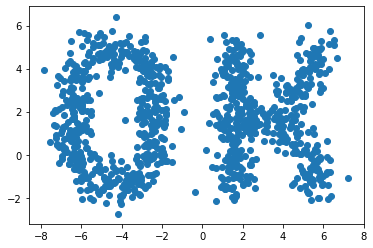

In [27]:
plt.scatter(use.V13,use.V21)

Aaaand here's the R code:

```R
# Read data in

x_data = read.csv(file = "~/Documents/GitHub/IntroML/Ex0/x.csv", header = TRUE, sep = ",")

?sapply
?var

vars = sapply(x_data, var)
vars

?which.max

imax1 = which.max(vars)
imax1

vars[imax1] = 0
vars

imax2 = which.max(vars)
imax2
```
```
plot(x_data[, imax1], x_data[, imax2])

```

And Here's the plot:

![ok](ok.png)

In [69]:
import numpy as np
import pandas as np

In [72]:
def func():
    values = []
    indices = []
    while True:
        try:
            value = input("anna indeksi ja väli arvo")
    
            if value == "":
                return pd.Series(values, index=indices)
            #arvot = re.split('\s', value)
    
            arvot = value.split(" ")
            values.append(arvot[1])
            indices.append(arvot[0])
    
            print(values)
            print(indices)
    
            if len(arvot) < 2:
                print("virhe: välilyönnin jälkeen pitää tulla toinen luku")
                raise ValueError
        except (NameError,ValueError):
            return pd.Series(None)
        except (IndexError):
            print("indeksivirhe")
            return pd.Series(values, index=indices)

In [74]:
func()

anna indeksi ja väli arvo a 1


['1']
['a']


anna indeksi ja väli arvo b 2


['1', '2']
['a', 'b']


anna indeksi ja väli arvo c 3


['1', '2', '3']
['a', 'b', 'c']


anna indeksi ja väli arvo 


a    1
b    2
c    3
dtype: object